In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
!pip install -q category_encoders
from category_encoders import OrdinalEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00


# Simple Neural Network(two layers)

##Preprocessing

In [ ]:
titanic_df=sns.load_dataset('titanic')
titanic_df.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
titanic_df

survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [ ]:
titanic_df=pd.get_dummies(titanic_df,columns=['sex','embarked'])
titanic_df

survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0           0       3  22.0      1      0   7.2500       False      True   
1           1       1  38.0      1      0  71.2833        True     False   
2           1       3  26.0      0      0   7.9250        True     False   
3           1       1  35.0      1      0  53.1000        True     False   
4           0       3  35.0      0      0   8.0500       False      True   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0       2  27.0      0      0  13.0000       False      True   
887         1       1  19.0      0      0  30.0000        True     False   
888         0       3   NaN      1      2  23.4500        True     False   
889         1       1  26.0      0      0  30.0000       False      True   
890         0       3  32.0      0      0   7.7500       False      True   

     embarked_C  embarked_Q  embarked_S  
0         False       False        True  
1          True       False       False  
2         False       False        True  
3         False       False        True  
4         False       False        True  
..          ...         ...         ...  
886       False       False        True  
887       False       False        True  
888       False       False        True  
889        True       False       False  
890       False        True       False  

[891 rows x 11 columns]

In [ ]:
titanic_df['age'].fillna(titanic_df['age'].mean(),inplace=True)

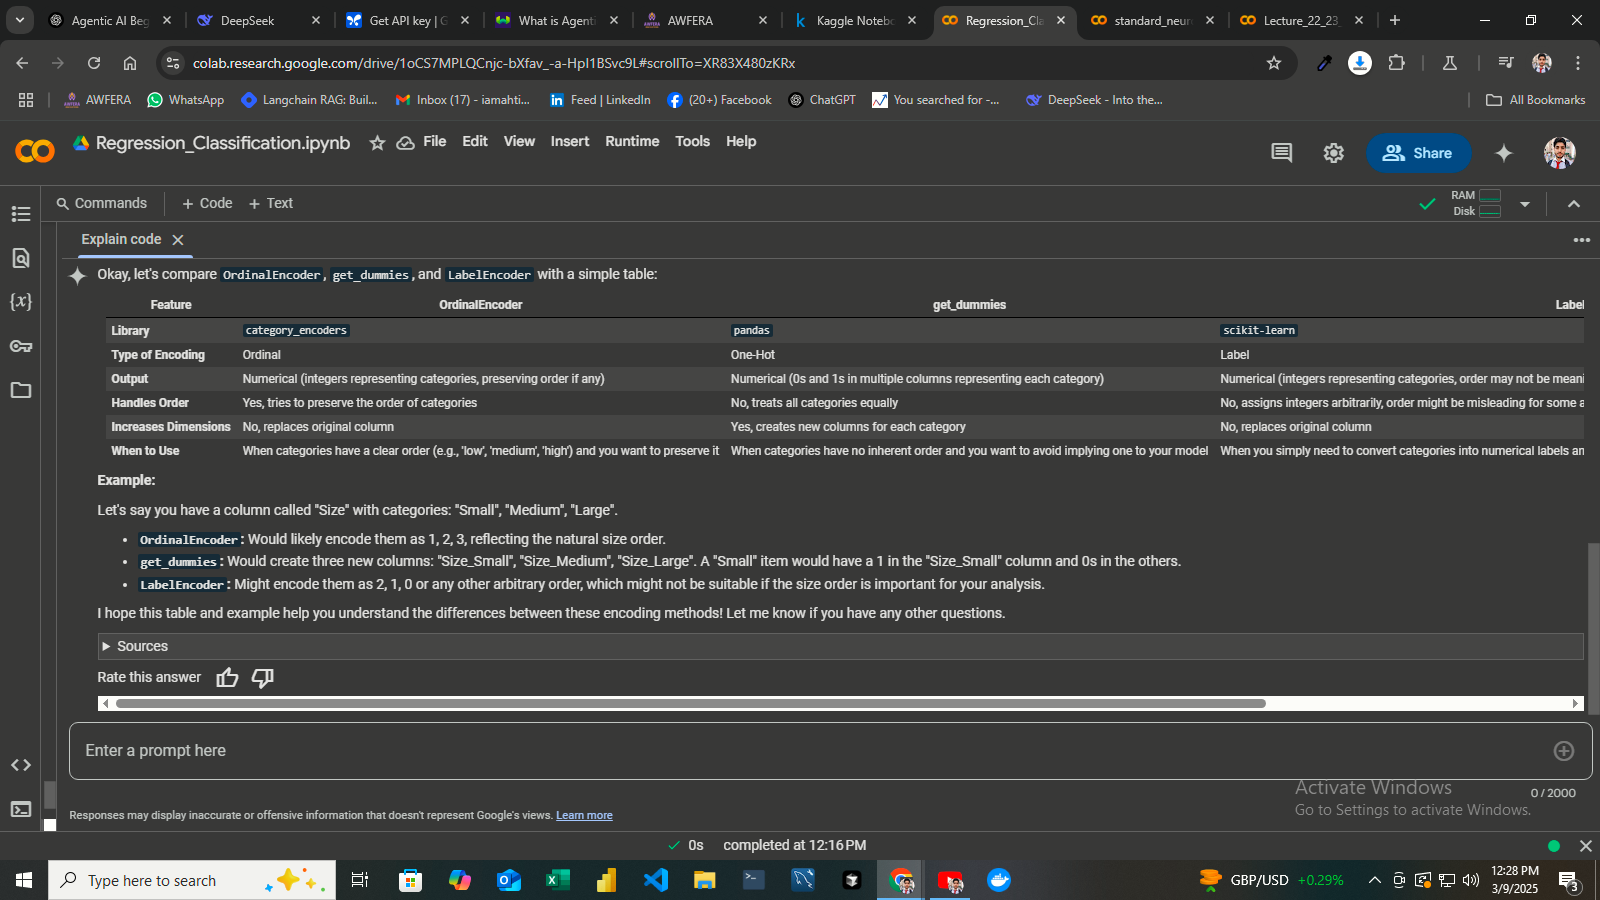

In [ ]:
titanic_df=titanic_df.astype(int)
x=titanic_df.drop(['survived'],axis=1)
y=titanic_df['survived']

print(x.shape)
print(y.shape)

(891, 10)
(891,)


Here's a breakdown:

**Centering**: It subtracts the mean of each feature from all the data points for that feature. This centers the data around zero.

**Scaling**: It divides each feature by its standard deviation. This ensures that all features have a similar range of values.

**Why is this useful?**

Many machine learning algorithms perform better when features have a similar range and are centered around zero.
It prevents features with larger values from dominating the model's learning process.
It can help algorithms converge faster.

            

```
                 x  - x.mean() / std
Scaled Size = (1500 - 1566.67) / 351.19 = -0.19
```



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
print('Before',x_train)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
print('After',x_train_scaled)

Before      pclass  age  sibsp  parch  fare  sex_female  sex_male  embarked_C  \
331       1   45      0      0    28           0         1           0   
733       2   23      0      0    13           0         1           0   
382       3   32      0      0     7           0         1           0   
704       3   26      1      0     7           0         1           0   
813       3    6      4      2    31           1         0           0   
..      ...  ...    ...    ...   ...         ...       ...         ...   
106       3   21      0      0     7           1         0           0   
270       1   29      0      0    31           0         1           0   
860       3   41      2      0    14           0         1           0   
435       1   14      1      2   120           1         0           0   
102       1   21      0      1    77           0         1           0   

     embarked_Q  embarked_S  
331           0           1  
733           0           1  
382           

In [ ]:
x_train_scaled.shape

(712, 10)

##Building Neural Network

In [ ]:
input_layer=tf.keras.layers.Dense(10, activation='relu',input_shape=(x_train_scaled.shape[1],))

output_layer=tf.keras.layers.Dense(1,activation='sigmoid')

model=tf.keras.models.Sequential([input_layer,output_layer])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
model.fit(x_train_scaled,y_train,epochs=100,batch_size=50,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3749 - loss: 0.8249
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4119 - loss: 0.7769 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4469 - loss: 0.7320 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5394 - loss: 0.6972 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.6541 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6969 - loss: 0.6388 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7521 - loss: 0.6053 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.5762 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7559 - loss: 0.5662 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7681 - loss: 0.5533 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.5273 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [ ]:
# evals
loss,accuracy=model.evaluate(x_test_scaled,y_test,verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8229 - loss: 0.4238 
Test Loss: 0.43782103061676025
Test Accuracy: 0.8212290406227112


## One Snippet

In [ ]:
%%time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
# titanic.dropna(subset=['age', 'embarked'], inplace=True)
# titanic['age'].fillna(titanic['age'].mean(),inplace=True) #filling with mean
titanic['age'].fillna(titanic['age'].median(),inplace=True) #filling with median
# titanic['age'].fillna(titanic['age'].mode(),inplace=True) #filling with mode
# titanic['age'].fillna(method='bfill',inplace=True) #filling with backward fill
# titanic['age'].fillna(method='ffill',inplace=True) #filling with forward fill
# titanic['age'].fillna('unknown',inplace=True) #filling with "unknown"

#Droping the extra columns
titanic.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

# Selecting features and target
x = titanic.drop(['survived'], axis=1)
y = titanic['survived']

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(x_train_scaled.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer,
                                    # hidden_layer,
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(x_test_scaled, y_test, verbose=1)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7261 - loss: 0.6074
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7323 - loss: 0.5924
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.5618
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7804 - loss: 0.5562
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.5443
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7703 - loss: 0.5360
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8161 - loss: 0.5039
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 0.5025
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.4784
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.4857
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 0.4579
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - lo

#Regression and Classification

In [ ]:
# sns.load_dataset()
sns.get_dataset_names()

# encoder=OrdinalEncoder()
# tips=encoder.fit_transform(tips)
# label_encoder=LabelEncoder()
# tips=label_encoder.fit_transform(tips)

# tips
# x=tips.drop(['tip'],axis=1)
# y=tips['tip']

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
tips=sns.load_dataset('tips')

median_bill=tips['total_bill'].median()
tips['total_bill']=tips['total_bill'].apply(lambda x:1 if x>median_bill else 0)

# The 'int' argument is not recognized by OrdinalEncoder.
# Replace 'int=0' with 'mapping' and define the desired mapping for each column.
#For example,  You can define mapping as a list of dictionaries,
#where each dictionary specifies the column name and its corresponding mapping.
# mapping=[{'col':'sex','mapping':{'Female':0,'Male':1}},
#          {'col':'smoker','mapping':{
#                                 'No':0,
#                                 'Yes':1
#                             }
#          }
#         ]
# encoder=OrdinalEncoder(cols=['sex','smoker'],mapping=mapping)
# tips=encoder.fit_transform(tips)

label_encoder=LabelEncoder()
tips=label_encoder.fit_transform(tips.shape[0])

tips

ValueError: y should be a 1d array, got an array of shape () instead.

In [ ]:
for col in tips.columns:
    print("============")
    print(tips[col].value_counts())
    print()

total_bill
0    122
1    122
Name: count, dtype: int64

tip
2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: count, Length: 123, dtype: int64

sex
1    157
0     87
Name: count, dtype: int64

smoker
0    151
1     93
Name: count, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time
Dinner    176
Lunch      68
Name: count, dtype: int64

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64



#Checking GPUs

In [ ]:

import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-6.1.85+-x86_64-with-glibc2.35
Tensor Flow Version: 2.18.0

Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Pandas 2.2.2
Scikit-Learn 1.6.1
SciPy 1.14.1
GPU is NOT AVAILABLE


In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#Multi-Layer perceptron

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install -q category_encoders
import category_encoders as ce
tips =sns.load_dataset('tips')

#preprocessing
#converting categorical variables to dummy variables
# tips=pd.get_dummies(tips,drop_first=True)
# from category_encoders import OrdinalEncoder

encoder=ce.OrdinalEncoder()
tips=encoder.fit_transform(tips)

x=tips.drop(['tip'],axis=1)
y=tips['tip']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1) #output layer
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

model.fit(x_train_scaled,y_train,epochs=100,batch_size=32,verbose=1)

loss,mae=model.evaluate(x_test_scaled,y_test,verbose=1)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 13.9171 - mae: 3.4685
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9170 - mae: 3.1620 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.4848 - mae: 2.9651 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6020 - mae: 2.7917 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.9231 - mae: 2.6357
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9378 - mae: 2.4641
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6297 - mae: 2.4041 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.0492 - mae: 2.2847 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0033 - mae: 2.0185 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6851 - mae: 1.9596
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4206 - mae: 1.8676 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.6989 - mae: 1.7086
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

## Validation data

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 9.7558 - val_loss: 8.2465
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.4145 - val_loss: 7.7624
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.1819 - val_loss: 7.2950
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.7127 - val_loss: 6.8451
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.2140 - val_loss: 6.4156
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.8355 - val_loss: 6.0113
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.9456 - val_loss: 5.6288
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.3282 - val_loss: 5.2702
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.0735 - val_loss: 4.9338
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.9624 - val_loss: 4.6155
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.0634 - val_loss: 4.3226
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.3554 - val_loss: 4.0522
E

<function matplotlib.pyplot.show(close=None, block=None)>

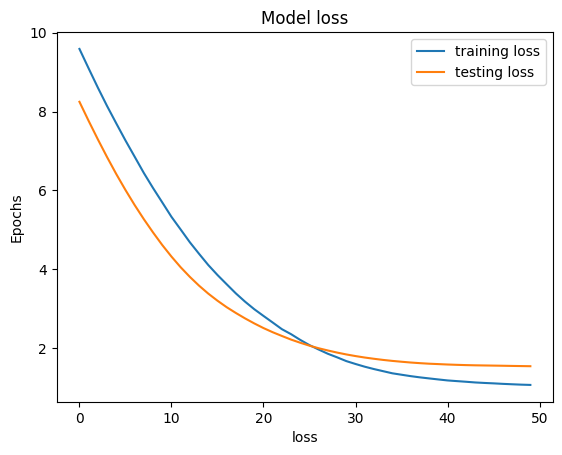

In [ ]:
# building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1) #output layer
])


model.compile(optimizer='adam',loss='mean_squared_error')

history=model.fit(x_train_scaled,y_train,epochs=50,batch_size=50,verbose=1,validation_split=0.10)

loss=model.evaluate(x_test_scaled,y_test,verbose=1)
print(loss)

# ploting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.legend(['training loss','testing loss'],loc='upper right')
plt.show

##EarlyStopping

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - loss: 14.2661 - val_loss: 10.1851
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.1087 - val_loss: 9.5682
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.3883 - val_loss: 8.9973
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.4642 - val_loss: 8.4669
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.9199 - val_loss: 7.9856
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.0213 - val_loss: 7.5315
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.7140 - val_loss: 7.1058
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.5291 - val_loss: 6.6998
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.2163 - val_loss: 6.3197
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.8733 - val_loss: 5.9547
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.6751 - val_loss: 5.6058
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.330

<function matplotlib.pyplot.show(close=None, block=None)>

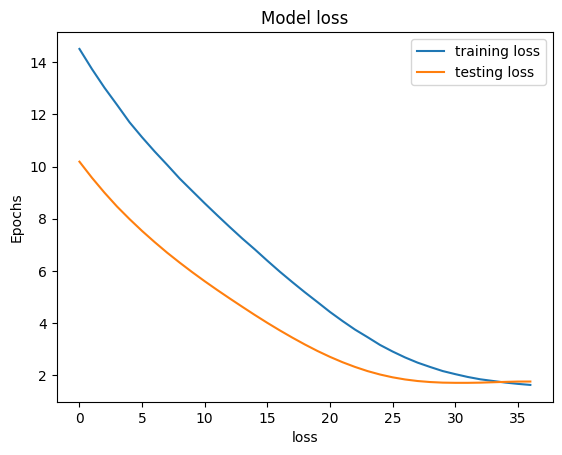

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1) #output layer
])

model.compile(optimizer='adam',loss='mean_squared_error')

#Define the callback function
early_stopping=EarlyStopping(patience=5)

history=model.fit(x_train_scaled,
                  y_train,epochs=100,
                  batch_size=50,
                  verbose=1,
                  validation_data=(x_test_scaled,y_test),
                  callbacks=[early_stopping])

loss=model.evaluate(x_test_scaled,y_test,verbose=1)
print(loss)

# ploting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.legend(['training loss','testing loss'],loc='upper right')
plt.show

#Checking batch_size

In [ ]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
!pip install -q category_encoders
from category_encoders import OrdinalEncoder
from keras import layers

tips=sns.load_dataset('tips')

ordinal_encoder=OrdinalEncoder()
tips=ordinal_encoder.fit_transform(tips)

#convert 'tip' to a binery var, 1 if tip is above 2,else 0
tips['tip']=(tips['tip'] >2).astype(int)

x=tips.drop(['tip'],axis=1)
y=tips['tip']

# scale the data
scaler=MinMaxScaler()
x_min_max_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_min_max_scaled,y,test_size=0.2,random_state=42)

# building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(14,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(7,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1,activation='sigmoid') #output layer
])

#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train the model
model.fit(x_train,y_train,epochs=5,batch_size=30,verbose=1)

print("testing accuracy")
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5182 - loss: 0.6924
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6356 - loss: 0.6874
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6995 - loss: 0.6712 
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7105 - loss: 0.6648 
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6833 - loss: 0.6628 
testing accuracy
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5653 - loss: 0.6938 
CPU times: user 3.02 s, sys: 214 ms, total: 3.24 s
Wall time: 18.4 s


In [ ]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
!pip install -q category_encoders
from category_encoders import OrdinalEncoder
from keras import layers

tips=sns.load_dataset('tips')

ordinal_encoder=OrdinalEncoder()
tips=ordinal_encoder.fit_transform(tips)

#convert 'tip' to a binery var, 1 if tip is above 2,else 0
tips['tip']=(tips['tip'] >2).astype(int)

x=tips.drop(['tip'],axis=1)
y=tips['tip']

# scale the data
scaler=MinMaxScaler()
x_min_max_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_min_max_scaled,y,test_size=0.2,random_state=42)

# building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(14,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(7,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1,activation='sigmoid') #output layer
])

#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train the model
model.fit(x_train,y_train,epochs=5,batch_size=50,verbose=1)

print("testing accuracy")
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3538 - loss: 0.7162
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4370 - loss: 0.7018
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4485 - loss: 0.6955 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5174 - loss: 0.6913 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5885 - loss: 0.6835
testing accuracy
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5172 - loss: 0.6835 
CPU times: user 2.77 s, sys: 232 ms, total: 3 s
Wall time: 12.6 s


#Convolutional Neural Networks

##mnist dataset

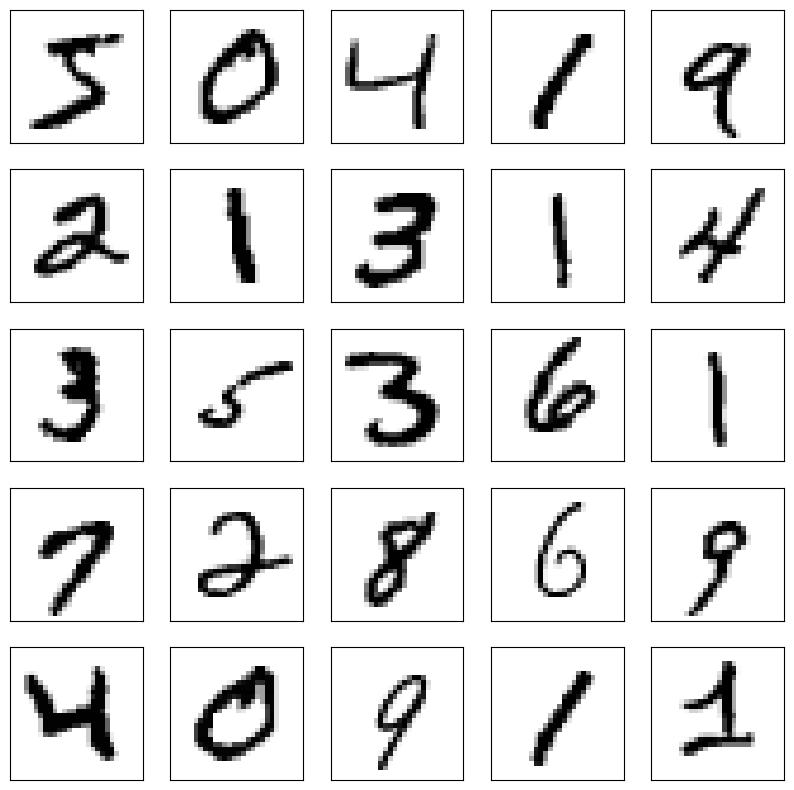

In [ ]:
from tensorflow import keras
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

# display some samples
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)

In [ ]:
#explore the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


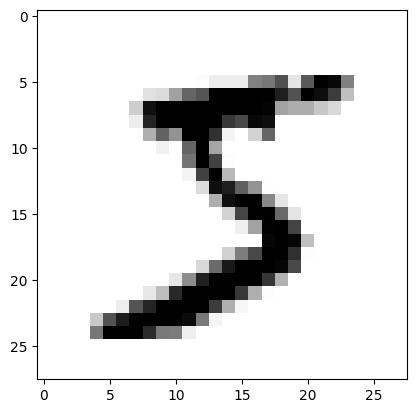

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

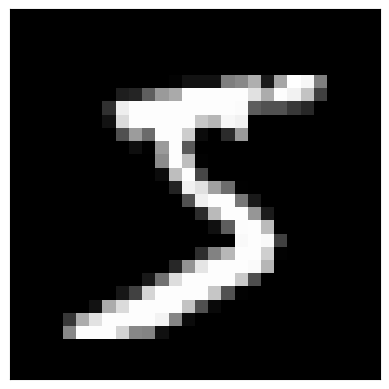

Pixel values
Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 2

In [ ]:
# Display the first image in the dataset as a data matrix
plt.imshow(x_train[0],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
print("Pixel values")
# Display the values of each pixel in the image
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0117647061124444 0.07058823853731155 0.07058823853731155 0.07058823853731155 0.4941176474094391 0.5333333611488342 0.686274528503418 0.10196078568696976 0.6509804129600525 1.0 0.9686274528503418 0.49803921580314636 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.11764705926179886 0.1411764770746231 0.3686274588108063 0.6039215922355652 0.6666666865348816 0.992156863

###build the model

In [ ]:
from tensorflow.keras import layers
#create an input layer
input_layer=tf.keras.layers.Input(shape=(28,28,1))# 28x28 pixel images with a single color channel

# cnn model building
model=tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    #filter is the number of filters we want to apply
    #kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(10,activation='relu')
])

model.summary()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 10)            │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6006 - loss: 1.2637 - val_accuracy: 0.9227 - val_loss: 0.2468
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9296 - loss: 0.2264 - val_accuracy: 0.9553 - val_loss: 0.1522
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9537 - loss: 0.1521 - val_accuracy: 0.9640 - val_loss: 0.1206
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9648 - loss: 0.1143 - val_accuracy: 0.9705 - val_loss: 0.1031
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9715 - loss: 0.0933 - val_accuracy: 0.9768 - val_loss: 0.0843
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.0746 - val_accuracy: 0.9772 - val_loss: 0.0785
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9775 - loss: 0.0716 - val_accuracy: 0.9759 - val_loss: 0.0839
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0654 - val_accuracy: 0.

<function matplotlib.pyplot.show(close=None, block=None)>

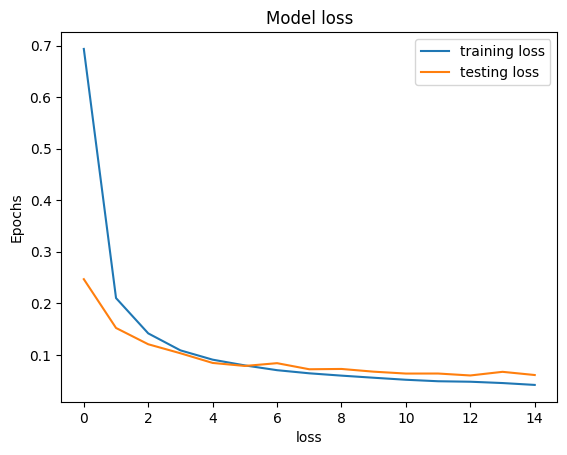

In [ ]:

#train the model
history=model.fit(x_train, y_train, epochs=15, batch_size=200, validation_split=0.2)

# ploting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.legend(['training loss','testing loss'],loc='upper right')
plt.show

In [ ]:
# Evaluate the model
print("test accuracy")
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=1)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_acc)

test accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0924 - loss: 2.3026


(28, 28)
(28, 28, 1)


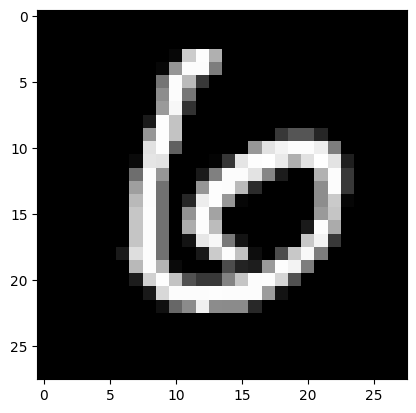

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[5.3773533e-07 8.7281331e-14 7.6974397e-14 8.5778704e-13 3.4431748e-12
  1.3177775e-08 9.9999940e-01 4.1113268e-14 5.5262186e-09 7.2565252e-14]]


In [ ]:
#grab an image
image=x_test[11]
print(image.shape)


#reshape the image to (28,28,1)
reshaped_image=image.reshape(28,28,1)
print(reshaped_image.shape)

#display the image
plt.imshow(reshaped_image,cmap='gray')
plt.show()

# predict the image
predictions=model.predict(image.reshape(1,28,28,1))
print(predictions)

In [ ]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 6.


##Fashion_mnist Image Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

fashion_mnist=fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test)=fashion_mnist
# plt.imshow(x_train[0])
# plt.title(y_train[0])

# print('Train Images',x_train.shape)
# print('Test Images',x_test.shape)
# print('Train Labels',y_train.shape)
# print('Test Labels',y_test.shape)

#one hot encoding
# y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
# y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

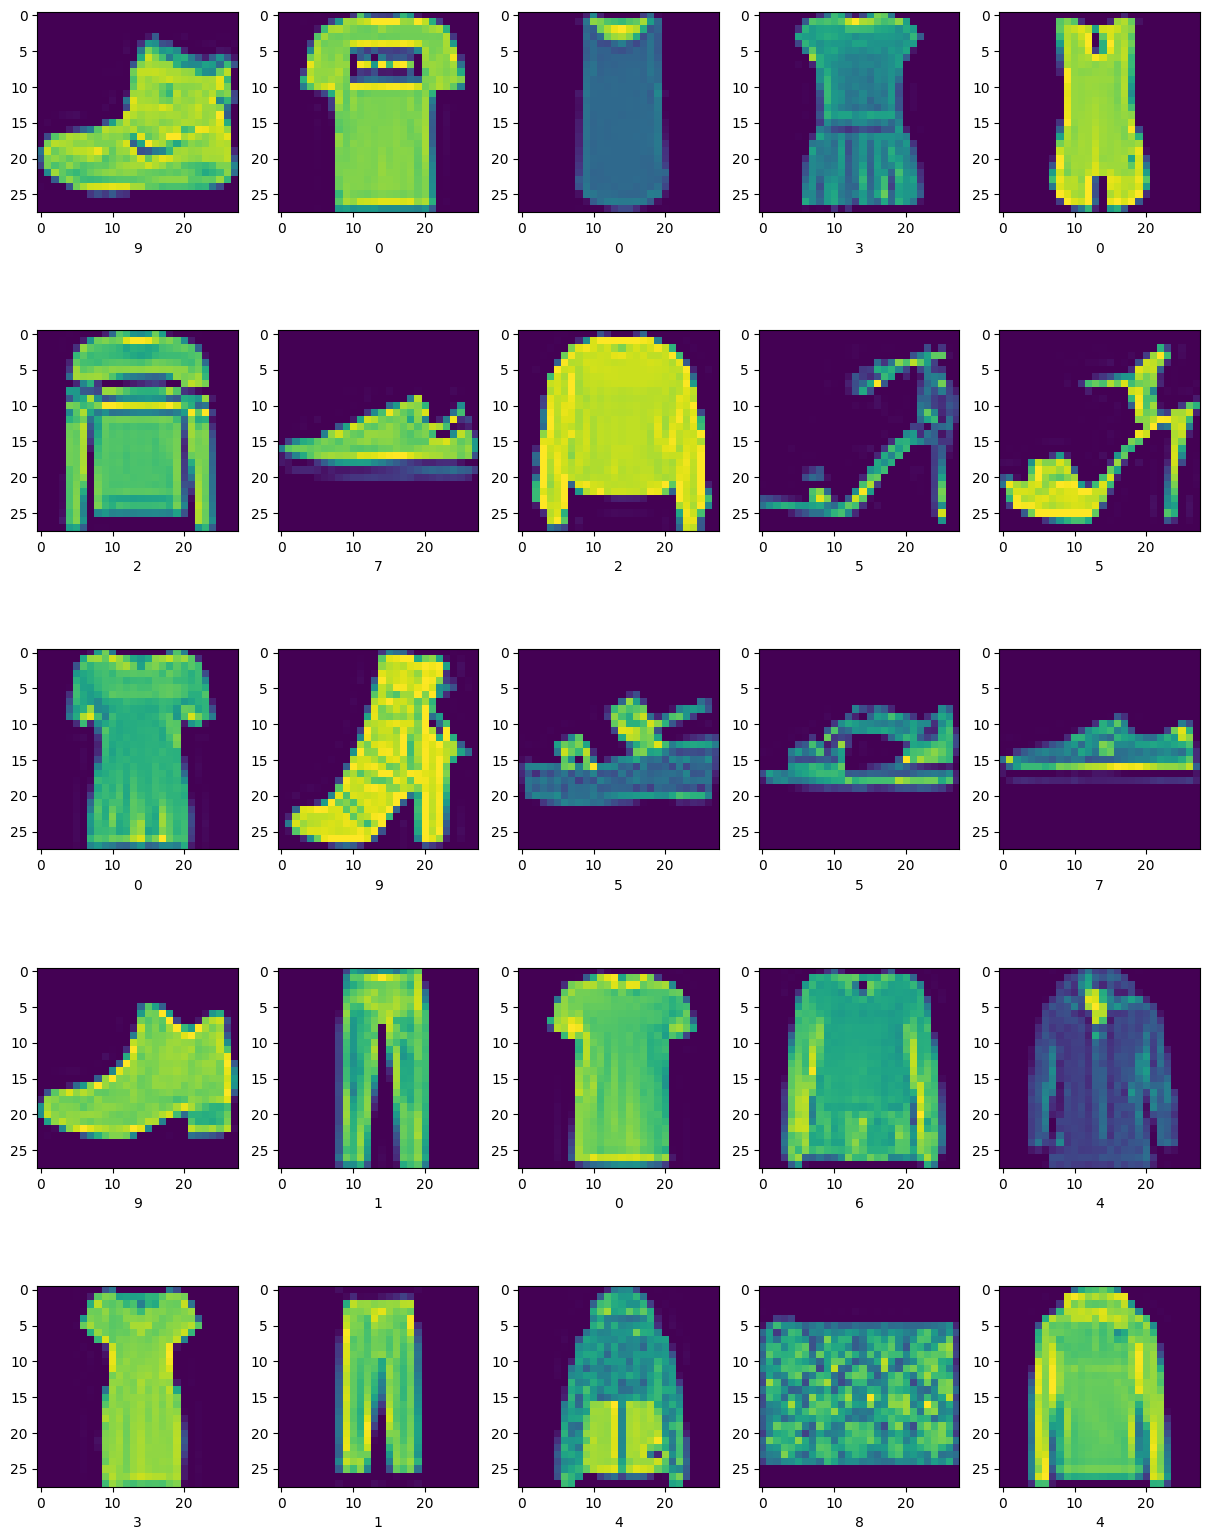

In [ ]:
plt.figure(figsize=(15,20))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
  plt.xlabel(y_train[i])

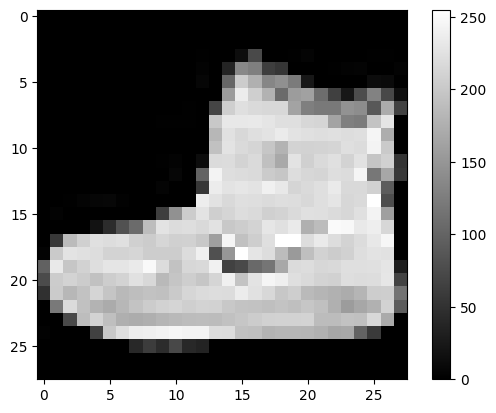

In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.colorbar()

In [ ]:
# print pixels of the image
for row in x_train[0]:
  for pixel in row:
    print("{:3}".format(pixel),end=" ")
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127 

In [ ]:
# normalizing the image values
x_train_normalized_float=x_train.astype('float32') / 255.0
x_test_normalized_float=x_test.astype('float32') / 255.0

In [ ]:
import tensorflow as tf

x_train_normalized_float = tf.keras.utils.normalize(x_train, axis=1)
x_test_normalized_float = tf.keras.utils.normalize(x_test, axis=1)

# x_train_normalized[0]

In [ ]:
# print pixels of the image
for row in x_train_normalized_float[0]:
  for pixel in row:
    print("{:0.3}".format(pixel),end=" ")
  print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.0 0.051 0.286 0.0 0.0 0.00392 0.0157 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0118 0.0 0.141 0.533 0.498 0.243 0.212 0.0 0.0 0.0 0.00392 0.0118 0.0157 0.0 0.0 0.0118 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0235 0.0 0.4 0.8 0.69 0.525 0.565 0.482 0.0902 0.0 0.0 0.0 0.0 0.0471 0.0392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.608 0.925 0.812 0.698 0.42 0.612 0.631 0.427 0.251 0.0902 0.302 0.51 0.282 0.0588 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.271 0.812 0.875 0.855 0.847 0.847 0.639 0.498 0.475 0.4

###Reshaping the images

In [ ]:
# reshape the images
x_train_normalized_float_reshaped=x_train_normalized_float.reshape(x_train_normalized_float.shape[0],28,28,1)
x_test_normalized_float_reshaped=x_test_normalized_float.reshape(x_test_normalized_float.shape[0],28,28,1)


# display(x_train_normalized_float_reshaped.shape)
# display(x_test_normalized_float_reshaped.shape)

# display(plt.gcf())
# display(plt.gca())

###Building the model

* ✅ **Filters** extract features from images (edges, patterns).

    **Example:**

    - filters=8 → Simple feature detection
    - filters=32 → Better feature detection
    - filters=128 → More complex patterns detected, but needs more computation
    * 📌 Effect of Increasing Filters:
    * ✅ More filters → Detects more patterns but needs more memory and

    computation.
    * ✅ Fewer filters → Faster training but might miss important details.


- ✅ **Kernel Size** defines the size of the feature detector.
- ✅ **MaxPooling (pool_size)** reduces image size while keeping important information.

**CNN Basics: Filters, Kernel Size, and Pooling**
1. Filters in CNN
Filters (kernels) are small matrices that slide over the image to detect patterns like edges and textures.
More filters improve feature detection but increase computation.
Example: filters=32 means 32 different feature detectors are used.
2. Kernel Size and Its Effect
Kernel size defines how much area the filter covers.
Common sizes: (3,3), (5,5), (7,7).
Larger kernels detect bigger patterns but may lose fine details.
3. MaxPooling and Pool Size
MaxPooling reduces image size while keeping the most important features.
pool_size=(2,2) is commonly used to halve the image size.
It helps reduce computation while keeping key features.
4. Effect of These Parameters
Filters (filters): More filters improve detection but slow down training.
Kernel Size (kernel_size): Larger sizes capture bigger patterns, smaller sizes detect fine details.
Pool Size (pool_size): Larger pooling reduces image size faster but may lose important details.
5. Example CNN Model
First Conv Layer: Extracts basic features.
MaxPooling (2x2): Reduces size while keeping important info.
Second Conv Layer: Extracts more complex features.
Flatten & Dense Layers: Make final predictions.
Key Takeaways
Filters extract important features from images.
Kernel size defines how much of the image is processed at a time.
MaxPooling reduces image size while keeping essential details.
This structure improves both accuracy and efficiency in CNN models.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)), #input layer

    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),#Conv layer
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #pooling layer (size reduction)

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),# Flatten layer

    tf.keras.layers.Dense(10,activation='softmax')

])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 32)          │           2,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,022 (43.05 KB)

 Trainable params: 11,022 (43.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6874 - loss: 0.8965 - val_accuracy: 0.8282 - val_loss: 0.4719
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8462 - loss: 0.4256 - val_accuracy: 0.8399 - val_loss: 0.4302
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8639 - loss: 0.3787 - val_accuracy: 0.8635 - val_loss: 0.3846
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8736 - loss: 0.3501 - val_accuracy: 0.8626 - val_loss: 0.3746
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8796 - loss: 0.3387 - val_accuracy: 0.8702 - val_loss: 0.3591
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8831 - loss: 0.3219 - val_accuracy: 0.8738 - val_loss: 0.3475
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8869 - loss: 0.3088 - val_accuracy: 0.8760 - val_loss: 0.3428
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0

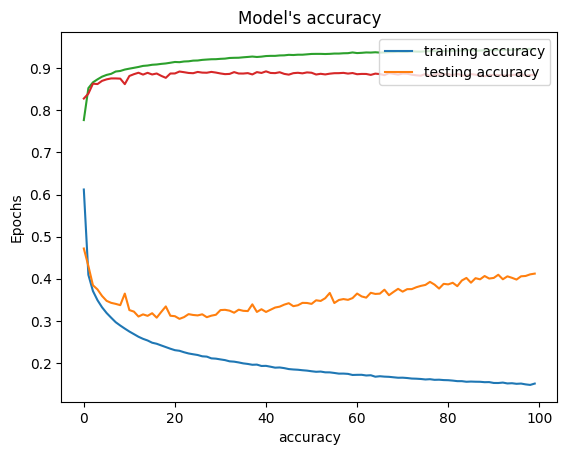

In [ ]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


#Define the callback function
early_stopping=EarlyStopping(patience=5)

history=model.fit(x_train_normalized_float_reshaped,y_train,
                  epochs=100,
                  batch_size=50,
                  verbose=1,
                  validation_data=(x_test_normalized_float_reshaped,y_test))

# EValuate the model

print("test accuracy")
test_loss, test_acc = model.evaluate(x_test_normalized_float_reshaped, y_test,verbose=1)

#plotning the training and testing loss



In [ ]:
print(test_acc)
print(test_loss)

0.8844000101089478
0.41221773624420166


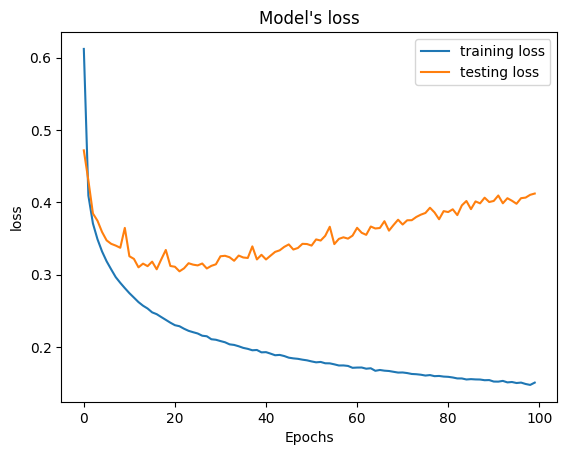

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss','testing loss'],loc='upper right')
plt.show()



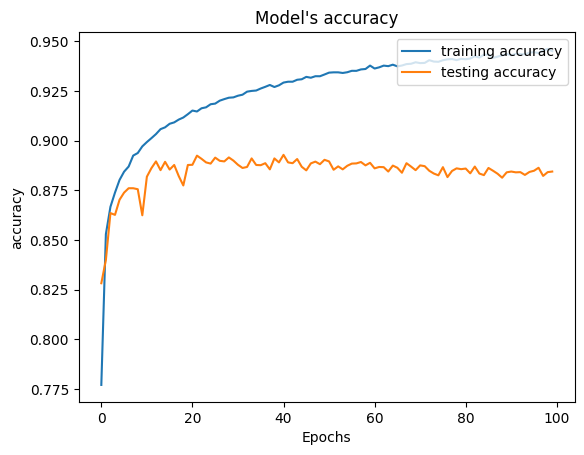

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's accuracy")
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')
plt.show()

In [ ]:
model.save('cnn_model.h5')

In [ ]:
model.save('my_model.keras')

In [ ]:
predictions=model.predict(x_test_normalized_float_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
predictions[1]

array([1.0091526e-04, 5.6185356e-15, 9.9574488e-01, 6.8233689e-08,
       2.0703122e-03, 6.6321494e-25, 2.0838641e-03, 2.7758374e-27,
       2.5350254e-14, 1.7889754e-22], dtype=float32)

In [ ]:
np.argmax(predictions[2])

np.int64(1)

<Axes: >

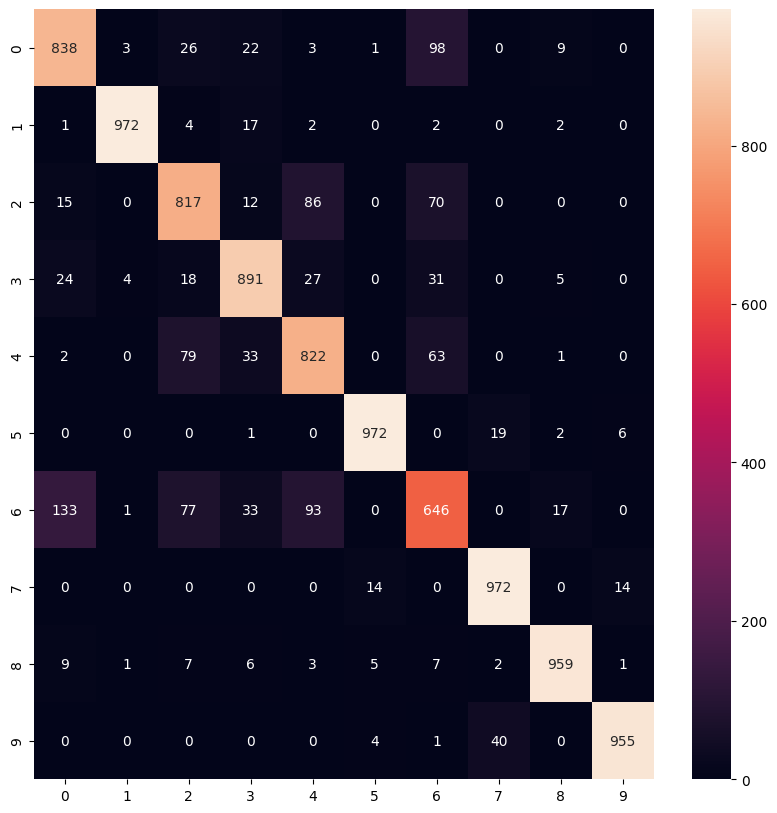

In [ ]:
# Draw a confusion matrics
cm=tf.math.confusion_matrix(y_test,np.argmax(predictions,axis=1))
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='g')

##Paddy Disease Classification all 480*640 px image

In [ ]:
!pip install -q kaggle opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/imbikramsaha/paddy-doctor")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahtishamyousaf
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imbikramsaha/paddy-doctor


100%|██████████| 1.02G/1.02G [00:20<00:00, 52.9MB/s]


{"username":"mahtishamyousaf","key":"34eab4cde8bfe9517cc5ef4672520156"}


In [ ]:
import pandas as pd
import opendatasets as od

# Read the train.csv file from the downloaded dataset
# Assuming the dataset is downloaded to /content/paddy-doctor
df = pd.read_csv('/content/paddy-doctor/paddy-disease-classification/train.csv')

df

image_id                  label variety  age
0      100330.jpg  bacterial_leaf_blight   ADT45   45
1      100365.jpg  bacterial_leaf_blight   ADT45   45
2      100382.jpg  bacterial_leaf_blight   ADT45   45
3      100632.jpg  bacterial_leaf_blight   ADT45   45
4      101918.jpg  bacterial_leaf_blight   ADT45   45
...           ...                    ...     ...  ...
10402  107607.jpg                 tungro   Zonal   55
10403  107811.jpg                 tungro   Zonal   55
10404  108547.jpg                 tungro   Zonal   55
10405  110245.jpg                 tungro   Zonal   55
10406  110381.jpg                 tungro   Zonal   55

[10407 rows x 4 columns]

In [ ]:
for col in df.columns:
    print("==========")
    print(df[col].value_counts())
    print()

image_id
110381.jpg    1
100330.jpg    1
100365.jpg    1
100382.jpg    1
100632.jpg    1
             ..
106539.jpg    1
104800.jpg    1
103920.jpg    1
103702.jpg    1
103051.jpg    1
Name: count, Length: 10407, dtype: int64

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

age
70    3077
60    1660
50    1066
75     866
65     774
55     563
72     552
45     505
67     415
68     253
80     225
57     213
47     11

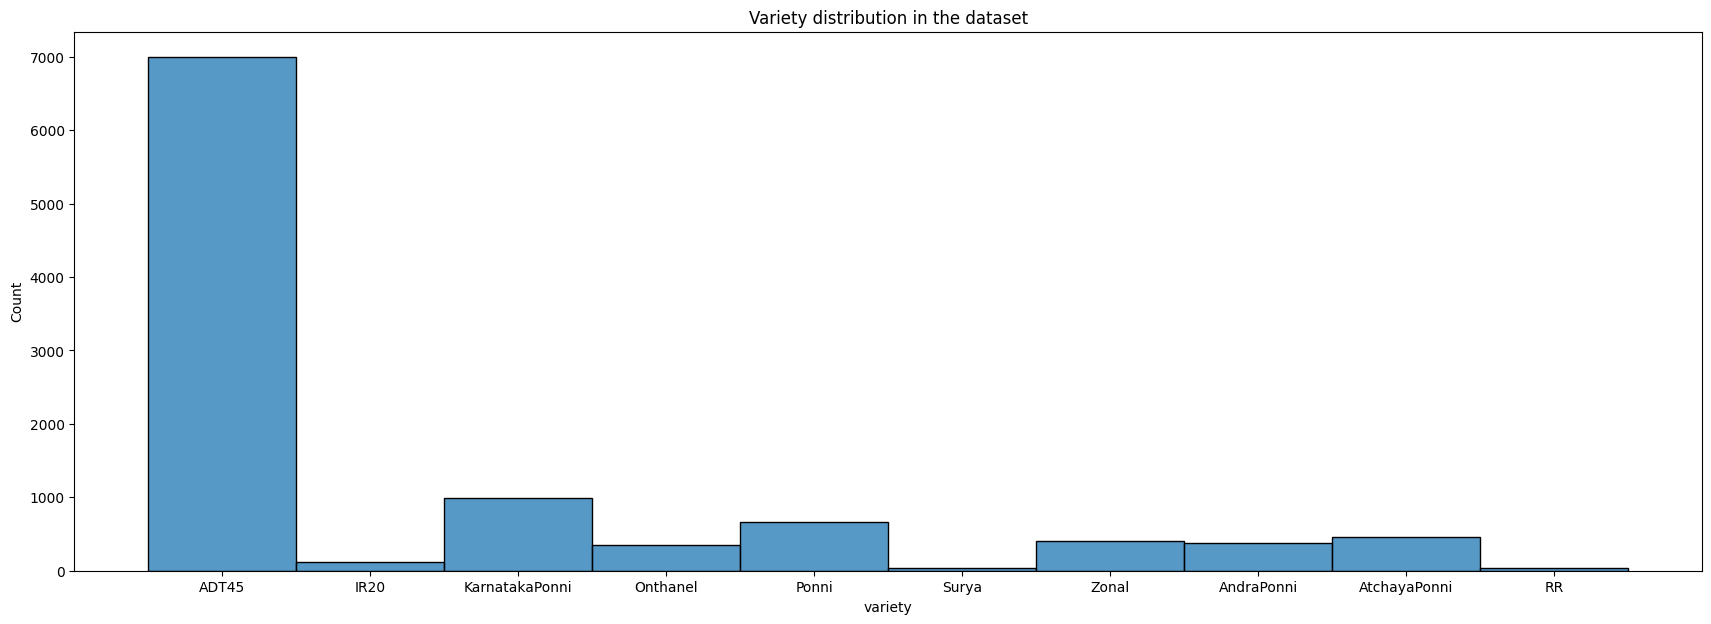

In [ ]:
# make a plot of images just to have an idea
# plot the data count based on variety name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(df,x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

<Axes: xlabel='label', ylabel='Count'>

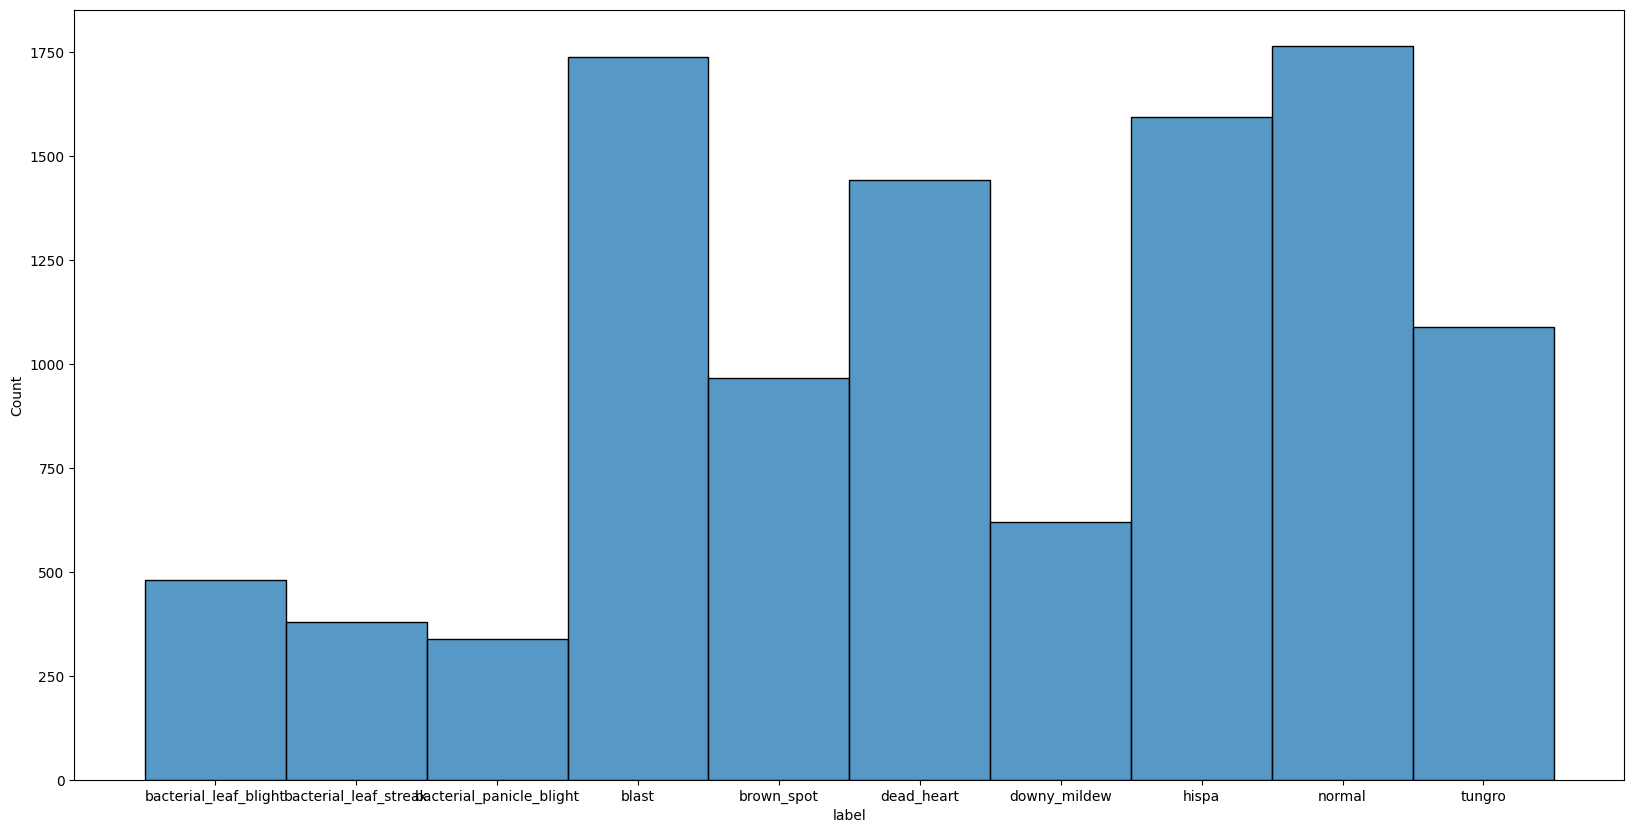

In [ ]:
# plot the data count based on variety name
plt.figure(figsize=(20,10))

sns.histplot(df,x='label')


In [ ]:

normal = df[df['label'] =='normal']
normal = normal[normal['variety'] =='ADT45']
five_normals = normal.image_id[:5].values
five_normals
# five_normals.tolist()

array(['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg',
       '100171.jpg'], dtype=object)

In [ ]:
dead = df[df['label'] =='dead_heart']
dead = dead[dead['variety'] =='ADT45']
five_deads= dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

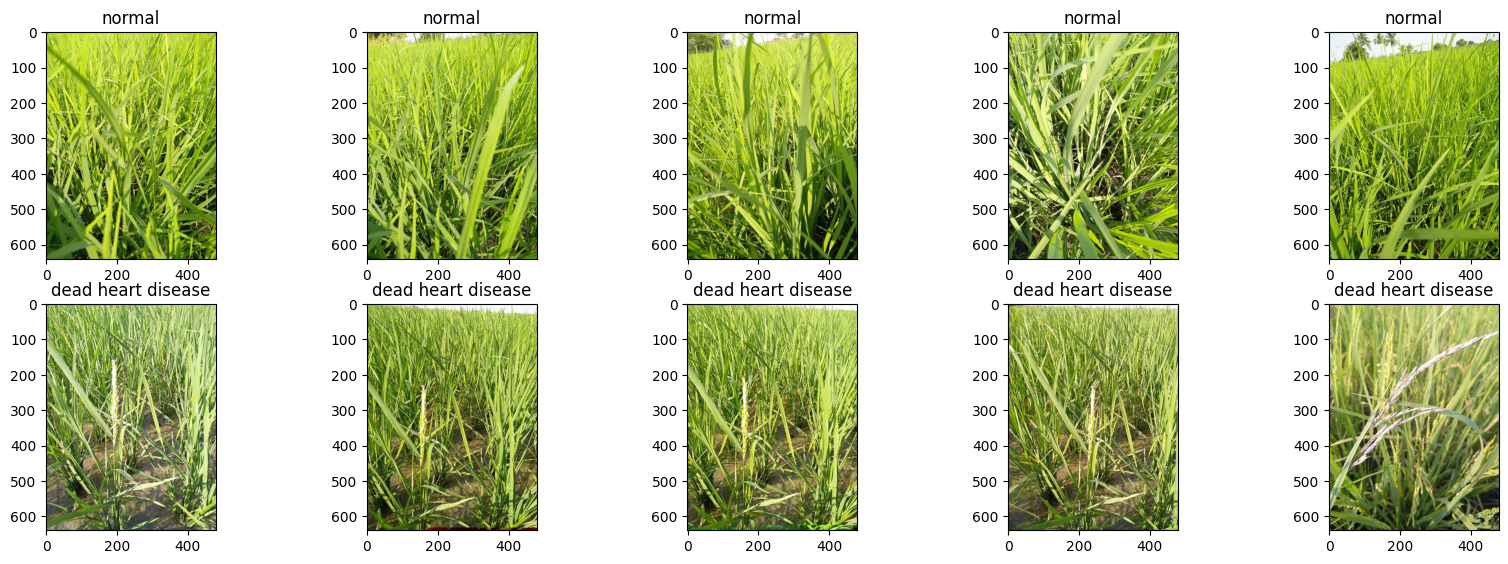

In [ ]:

# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = '/content/paddy-doctor/paddy-disease-classification/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i + 1)

    if i < 5:
        image=plt.imread(path +"normal/"+ image_loc)
        plt.title("normal")
    else:
        plt.title("dead heart disease")
        image=plt.imread(path +"dead_heart/"+ image_loc)

    plt.imshow(image)

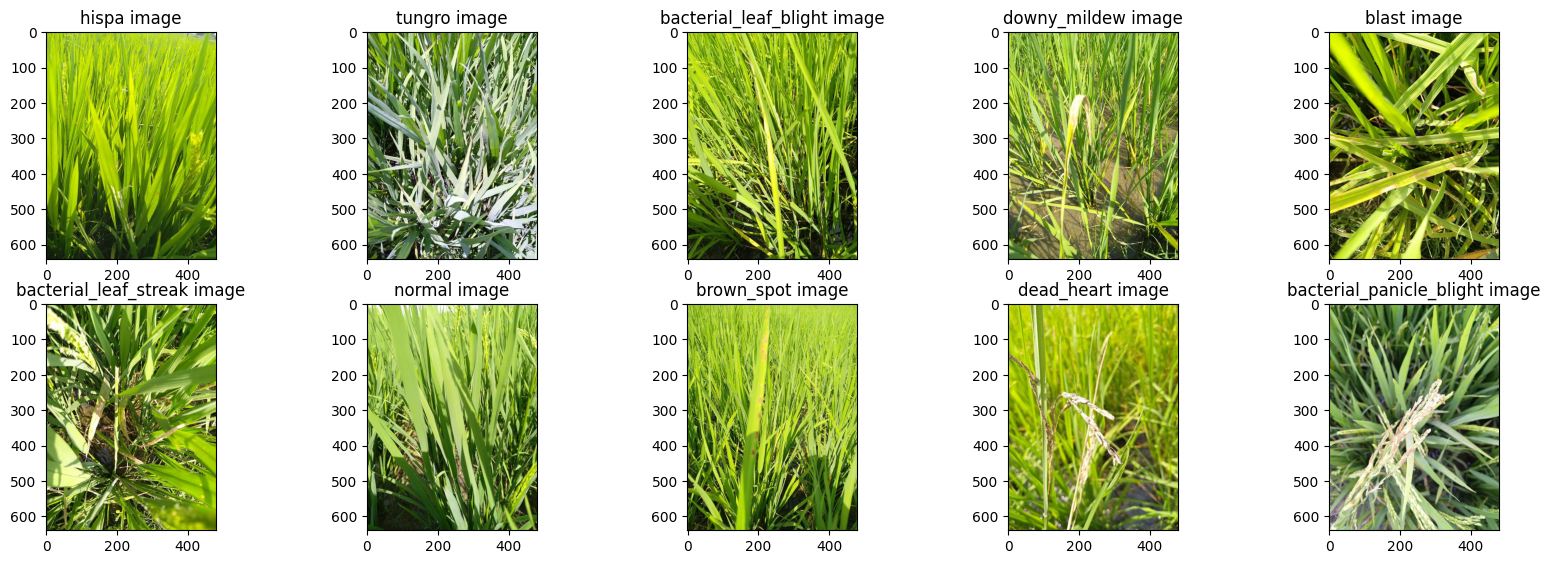

In [ ]:
images = ['/content/paddy-doctor/paddy-disease-classification/train_images/hispa/106590.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/tungro/109629.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/bacterial_leaf_blight/109372.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/downy_mildew/102350.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/blast/110243.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/bacterial_leaf_streak/101104.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/normal/109760.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/brown_spot/104675.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/dead_heart/105159.jpg',\
          '/content/paddy-doctor/paddy-disease-classification/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [ ]:
df['label']=LabelEncoder().fit_transform(df['label'])
df['variety']=LabelEncoder().fit_transform(df['variety'])

df

image_id  label  variety  age
0      100330.jpg      0        0   45
1      100365.jpg      0        0   45
2      100382.jpg      0        0   45
3      100632.jpg      0        0   45
4      101918.jpg      0        0   45
...           ...    ...      ...  ...
10402  107607.jpg      9        9   55
10403  107811.jpg      9        9   55
10404  108547.jpg      9        9   55
10405  110245.jpg      9        9   55
10406  110381.jpg      9        9   55

[10407 rows x 4 columns]

In [ ]:
for col in df.columns:
    print("==========")
    print(df[col].value_counts())
    print()

image_id
110381.jpg    1
100330.jpg    1
100365.jpg    1
100382.jpg    1
100632.jpg    1
             ..
106539.jpg    1
104800.jpg    1
103920.jpg    1
103702.jpg    1
103051.jpg    1
Name: count, Length: 10407, dtype: int64

label
8    1764
3    1738
7    1594
5    1442
9    1088
4     965
6     620
0     479
1     380
2     337
Name: count, dtype: int64

variety
0    6992
4     988
6     657
2     461
9     399
1     377
5     351
3     114
7      36
8      32
Name: count, dtype: int64

age
70    3077
60    1660
50    1066
75     866
65     774
55     563
72     552
45     505
67     415
68     253
80     225
57     213
47     112
77      42
73      38
66      36
62       5
82       5
Name: count, dtype: int64



In [ ]:
batch_size = 32
image_size = (224, 224)
image_height = 224
image_width = 224

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/paddy-doctor/paddy-disease-classification/train_images',
    validation_split=0.2,
    subset='training',
    seed=123,
    batch_size=batch_size,
    image_size=image_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/paddy-doctor/paddy-disease-classification/train_images', # Use the same directory as train_dataset
    validation_split=0.2, # Use the same validation_split as train_dataset
    subset='validation', # Use 'validation' to get the validation set
    seed=123, # Use the same seed as train_dataset
    batch_size=batch_size,
    image_size=image_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [ ]:
# Get the total number of batches in the training dataset
num_batches_train = tf.data.experimental.cardinality(train_dataset).numpy()
print(f"Number of training batches: {num_batches_train}")

# Get the total number of images in the training dataset by multiplying num_batches_train by batch_size
num_images_train = num_batches_train * batch_size
print(f"Number of training images: {num_images_train}")


# Print information about the validation dataset
print("Validation dataset:", validation_dataset)
# Similar to train_dataset, to get the number of validation batches and images, use:
num_batches_val = tf.data.experimental.cardinality(validation_dataset).numpy()
print(f"Number of validation batches: {num_batches_val}")
num_images_val = num_batches_val * batch_size
print(f"Number of validation images: {num_images_val}")

# Iterate over the training dataset to see its content (optional):
# for images, labels in train_dataset.take(1):
#     print("Image batch shape:", images.shape)
#     print("Label batch shape:", labels.shape)

Number of training batches: 261
Number of training images: 8352
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Number of validation batches: 66
Number of validation images: 2112


In [ ]:
class_names=train_dataset.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

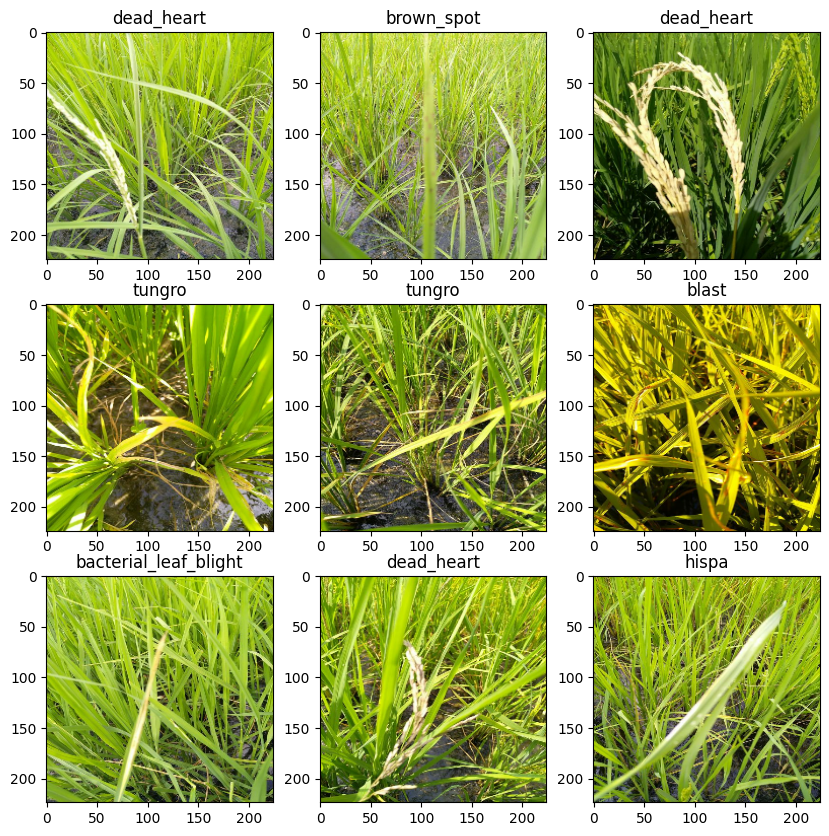

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    # plt.axis("off")
plt.show()

In [ ]:
for image_batch,labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    print(labels_batch)
    print(image_batch)
    break

(32, 224, 224, 3)
(32,)
tf.Tensor([4 1 3 5 8 4 4 0 6 3 8 7 9 4 4 5 7 3 5 4 7 0 5 6 2 9 6 8 4 9 5 7], shape=(32,), dtype=int32)
tf.Tensor(
[[[[1.64969391e+02 1.94969391e+02 3.69693871e+01]
   [1.66714279e+02 1.96714279e+02 3.67142868e+01]
   [1.68857147e+02 1.98857147e+02 3.88571434e+01]
   ...
   [1.76142883e+02 2.05142883e+02 6.31224785e+01]
   [1.85102890e+02 2.15245712e+02 7.55314255e+01]
   [1.38122086e+02 1.72979202e+02 3.68975677e+01]]

  [[1.65908157e+02 1.95908157e+02 3.79081650e+01]
   [1.67714279e+02 1.97714279e+02 3.77142868e+01]
   [1.69857147e+02 1.99857147e+02 3.98571434e+01]
   ...
   [2.08153015e+02 2.34367310e+02 9.77244415e+01]
   [1.50755249e+02 1.79336838e+02 4.56021347e+01]
   [1.20245064e+02 1.54102173e+02 2.46531754e+01]]

  [[1.66571426e+02 1.96571426e+02 3.85714302e+01]
   [1.68714279e+02 1.98714279e+02 3.87142868e+01]
   [1.70857147e+02 2.00857147e+02 4.08571434e+01]
   ...
   [2.20163406e+02 2.39551117e+02 1.10347061e+02]
   [1.25663574e+02 1.53622726e+02 2.7

In [ ]:
np.argmax(image_batch[0])

np.int64(2143)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # Use 'sigmoid' for binary classification
])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) use for one hot encoded features
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 52, 52, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 26, 26, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 12, 12, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 2,459,114 (9.38 MB)

 Trainable params: 2,458,634 (9.38 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
early_stopping=EarlyStopping(patience=5)

history=model.fit(train_dataset,
                  validation_data=validation_dataset,
                  epochs=40,
                  callbacks=[early_stopping])

loss, accuracy=model.evaluate(validation_dataset)

#ploting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss','testing loss'],loc='upper right')
plt.show()

#ploting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')
plt.show()



Epoch 1/40
  7/261 ━━━━━━━━━━━━━━━━━━━━ 12:20 3s/step - accuracy: 0.1812 - loss: 3.6750

KeyboardInterrupt: 

#Recurrent Neural Network (RNN)